## Reducing data dimensions

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce
import skimage.measure
%matplotlib inline

In [4]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

We are using the Electron Region data.

In [5]:
data = pd.read_csv("output_data/ElectronRegionData.csv") # Electron Region

In [6]:
# View the merged data head
data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [7]:
# Check the shape of the merged dataframe
data.shape

(64512, 7)

Check for null values.

In [8]:
data.isnull().sum()

event       0
eta         0
phi         0
et          0
position    0
electron    0
tau         0
dtype: int64

There are no null values in the data.

### Plotting the values onto a matrix

We are using the electron region data for the 0th event.

In [9]:
event_data = data.loc[data['event'] == 0]

In [10]:
# View the first five rows of dataframe
event_data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


In [11]:
# Number of data values in an event
event_data.shape[0]

252

In [12]:
event_data['position'].unique()

array([ 9,  5,  6, 14,  1,  3, 16,  2, 15,  8, 12, 11,  0,  4, 13,  7, 10],
      dtype=int64)

In [13]:
# event_data.to_csv('output_data/zero_event_data.csv')

In [ ]:
event_data

In [19]:
single_cycle_data = event_data[event_data['eta']==0]
single_cycle_data

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0
5,0,0,5,4.74265,3,0,0
6,0,0,6,11.83710,5,0,0
7,0,0,7,9.57456,16,1,0
8,0,0,8,2.85446,1,0,0
9,0,0,9,11.12570,2,0,1


In [23]:
single_cycle_data.sort_values(by='position')

,event,eta,phi,et,position,electron,tau
8,0,0,8,2.85446,1,0,0
4,0,0,4,5.66144,1,0,0
11,0,0,11,6.46432,1,0,0
10,0,0,10,9.09568,1,0,1
9,0,0,9,11.12570,2,0,1
15,0,0,15,6.86677,3,0,0
5,0,0,5,4.74265,3,0,0
14,0,0,14,9.46717,5,0,1
12,0,0,12,11.40250,5,1,0
17,0,0,17,9.95391,5,0,0


In [22]:
event_data['eta'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [93]:
# Convert the series into a 14x18 matrix
x_elec = np.array(event_data['electron'])
matrix_electron = np.asmatrix(x_elec)

# Resizing into size 14x18
matrix_electron.resize((14, 18))

Plotting the values of matrix on 2D plot

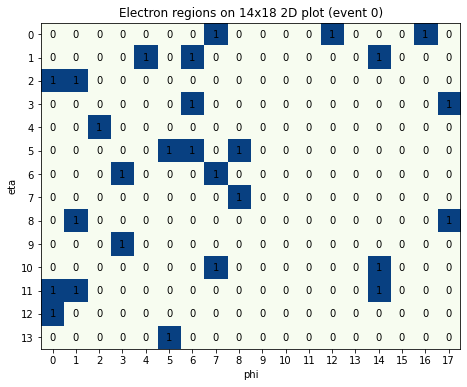

In [12]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_electron, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_electron.shape[0]))
plt.xticks(range(matrix_electron.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_electron.shape[0]):
    for y in range(matrix_electron.shape[1]):
        ax.annotate(str(matrix_electron[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

### ET values

In [13]:
# Convert the series into a 14x18 matrix
x_et = np.array(event_data['et'])
matrix_et = np.asmatrix(x_et)

# Resizing into size 14x18
matrix_et.resize((14, 18))

**Plot the 2-D matrix**

Text(0.5, 1.0, 'ET values on a 14x18 2-D plot')

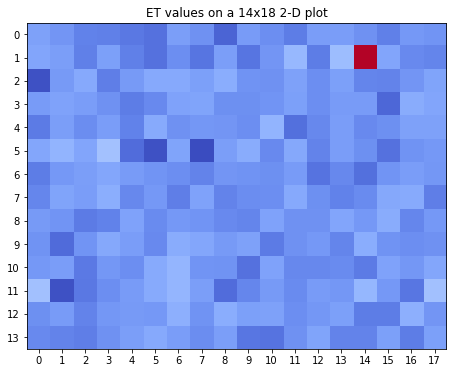

In [109]:
plt.figure(figsize=(18,6))
plt.imshow(matrix_et, cmap=plt.cm.coolwarm)
plt.yticks(range(matrix_et.shape[0]))
plt.xticks(range(matrix_et.shape[1]));
plt.title("ET values on a 14x18 2-D plot")

### Merge the energies with corresponding values of electron

We will now merge the energy of two neighbouring bits containing electron.

In [100]:
# Geting the matrix as numpy array
energy_array = np.array(matrix_et)

In [107]:
# Set initial value of prev val as 0
prev_val = 0

# Loop through rows of the electron values
for i, row in enumerate(np.array(matrix_electron)):
    
    # Loop through value of electron in each row of the matrix
    for j, val in enumerate(row):
        
        # If the signal value is 1
        if val == 1:
            
            # Check if previous value was also 1
            if val == prev_val:
                print("Position prev: (%s , %s)" % (i, j-1))
                print("Position : (%s , %s)" % (i, j))
                
                # Get the value of energy (ET) of both the positions
                energy1 =  matrix_et.item(i, j-1)
                energy2 =  matrix_et.item(i, j)
                
                # If the first position contains higher ET, merge the energy of both the positions and save it in that position
                if energy1>energy2:
                    energy_array[i, j-1] = energy_array[i, j-1] + energy_array[i, j]
                    energy_array[i, j] = 0 # Set ET of next position as 0
                    
                # If the second position contains higher ET, merge the energy of both the positions and save it in that position
                elif energy1<energy2:
                    energy_array[i, j] = energy_array[i, j-1] = energy_array[i, j]
                    energy_array[i, j-1] = 0 # Set ET of previous position as 0
                
                # If the ETs are equal, merge the energy of both the positions and save it in left(first) position
                elif energy1==energy2:
                    energy_array[i, j-1] = energy_array[i, j-1] + energy_array[i, j]
                    energy_array[i, j] = 0 # Set ET of next position as 0

        # Set the value of previous value as current value for next iteration
        prev_val = val

Position prev: (2 , 0)
Position : (2 , 1)
Position prev: (5 , 5)
Position : (5 , 6)
Position prev: (11 , 0)
Position : (11 , 1)


Let us now check the resulting array of ET (energy) which contains 0 energy areas as well.

In [108]:
energy_array

array([[12.1518  , 10.1904  ,  7.06514 ,  6.87023 ,  5.66144 ,  4.74265 ,
        11.8371  ,  9.57456 ,  2.85446 , 11.1257  ,  9.09568 ,  6.46432 ,
        11.4025  , 11.488   ,  9.46717 ,  6.86677 , 10.857   ,  9.95391 ],
       [12.9616  , 11.627   ,  6.9384  , 11.8455  ,  6.85379 ,  4.79889 ,
         8.95338 ,  5.232   , 11.8398  ,  5.21986 , 10.2813  , 16.6035  ,
         6.40747 , 17.8355  , 61.2263  , 12.8545  ,  8.34197 ,  7.65753 ],
       [ 0.      , 10.9044  , 13.5767  ,  6.55393 , 11.0815  , 13.6121  ,
        13.5853  , 12.0453  , 14.323   ,  9.66951 ,  9.5082  , 12.1601  ,
         9.13667 , 12.0633  ,  7.60152 ,  7.42437 , 10.3129  , 12.6219  ],
       [11.3169  , 12.5299  , 11.3731  ,  9.64484 ,  6.42877 ,  8.32366 ,
        12.3695  , 12.5982  ,  9.27314 ,  9.30789 , 10.0052  , 11.9414  ,
         9.16978 , 11.23    , 11.2227  ,  3.31536 , 14.2439  , 12.9276  ],
       [ 6.1857  , 11.8325  ,  8.75215 , 11.3837  ,  7.08786 , 13.8312  ,
         9.55222 , 10.4509  , 10.3

**Plot the 2-D matrix**

Text(0.5, 1.0, 'ET values on a 14x18 2-D plot')

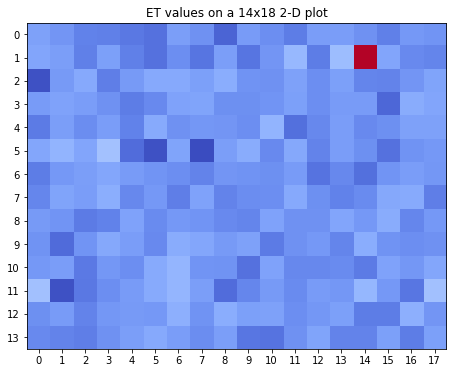

In [110]:
plt.figure(figsize=(18,6))
plt.imshow(energy_array, cmap=plt.cm.coolwarm)
plt.yticks(range(energy_array.shape[0]))
plt.xticks(range(energy_array.shape[1]));
plt.title("ET values on a 14x18 2-D plot")

### Reduce the dimensions of the matrix using 2x2 regions max

We will now reduce the dimensions of our matrix from 14x18 to 7x9 using 2x2 region max pooling, i.e., eplacing 2x2 regions by only the highest value of ET (energy).

In [111]:
reduced_et_matrix = skimage.measure.block_reduce(energy_array, (2,2), np.max)

In [112]:
reduced_et_matrix.shape

(7, 9)

**Plot the 2-D matrix**

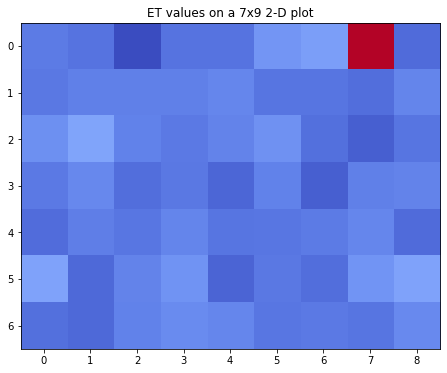

In [113]:
plt.figure(figsize=(18,6))
plt.imshow(reduced_et_matrix, cmap=plt.cm.coolwarm)
plt.yticks(range(reduced_et_matrix.shape[0]))
plt.xticks(range(reduced_et_matrix.shape[1]));
plt.title("ET values on a 7x9 2-D plot");

In [123]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(reduced_et_matrix)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8
0,12.961600,11.845500,6.853790,11.837100,11.839800,16.603500,17.835500,61.226300,10.857000
1,12.529900,13.576700,13.612100,13.585300,14.323000,12.160100,12.063300,11.222700,14.243900
2,15.757200,18.654300,13.831200,12.701000,14.033000,15.853300,11.500100,9.198130,12.107800
3,12.654500,14.694400,11.126200,12.563600,10.175900,13.759000,9.210650,13.439800,13.899000
4,11.040200,13.305400,12.339900,14.152700,12.147800,12.346600,12.841900,14.288000,10.815600
5,18.506710,10.605700,13.971400,16.155000,9.869230,12.461500,11.206100,16.215500,18.476100
6,11.342900,10.564700,13.657300,14.950600,14.490200,12.176100,12.708000,12.078500,14.771100


### Reduce the dimensions of the matrix using 2x2 regions electrons

We will now reduce the dimensions of our matrix from 14x18 to 7x9 using 2x2 region electrons.

The pos numbers in the small squares are the 4-bit position within the UCTRegion. Each 4x4 square of similarly colored 16 “towers” forms a UCTRegion. The UCTRegion object represents the summary for that 4x4 square. Summary includes where the energy weighted center is. That is the “pos” value for that UCTRegion. It could go 0 through 15 and the numbering is as I wrote on the PDF picture.


### Sort electrons in decreasing order of ET

We will now only get 6 electrons in decreasing order of ET from highest to lowest.

- You have 18x14 such colored UCT regions 
- Select highest two electrons in each 2x2 UCT region –if there is no electron set ET=0, ele=0,pos=0 
- This will lead to exactly 9x7 =63“electrons” –some of which may be 0
- Then sort those on decreasing order of electron ET, keeping track of region index and keep 6 electrons.